# Legolas Demo Code

Use this code to test your calibration values and as a reference for solving the challenges

In [ ]:
# Edit stage.home() by reporting x_start, y_start. See #added in core.py.
# Edit pH by reading voltage. Edit core.py. In Jupyter, convert voltage to pH. Print voltage, pH.

In [1]:
#Can't install here. Do pip install in Anaconda prompt
!pip install GPy
# GPFlow, GPyTorch
!pip install GPyOpt

In [1]:
from core import *
import utils
import time as time
from pathlib import Path

# import time is in core
# import Path is in core

In [2]:
# this is how you reset the rpyc server when facing the port already in use
# need to change to actual host name
host_1 = "192.168.1.11"
host_2 = "192.168.1.14"

utils.restart_server(host=host_1)
utils.restart_server(host=host_2)

kill server at PID:2355
restarting the rpyc server at host: 192.168.1.11
rpyc server start successfully
kill server at PID:1136
restarting the rpyc server at host: 192.168.1.14
rpyc server start successfully


In [ ]:
!dir .

In [45]:
stage, depo_device, pH_device, conn1, conn2, config = load_from_config("config.yaml")

gets to #6.
gets to #7
gets to #8
gets to #11. long timeout
gets to #17. finishes connect_pi1
gets to #18a
gets to #18b. Right after conn=rpyc.classic.connect
gets to #13. long timeout
gets to #15. long timeout at 120 sec
gets to #14. long timeout at 120 sec
gets to #16. med timeout at 110 sec (reproducible)
gets to #12. short timeout (reproducible)
gets to #9. short timeout
gets to #18. Finishes connect_pi2
gets to #10 in load_from_config
gets to #5 in load_from_config


In [ ]:
# it is ok if this fails, just move on to the next code block
# sanity_check(stage=stage, pH_device=pH_device, depo_device=depo_device)

In [ ]:
# find the usb port if problem occur
list_ports = conn1.modules['serial.tools.list_ports']

ports=list_ports.comports()
for port, desc, hwid in sorted(ports):
    print(port, desc, hwid)

In [25]:
# Go to Home Position
x_start, y_start = stage.home()            #added
#print('home x_start, y_start (motor coords):', x_start, y_start)     #added

## Test Device Functionality

In [ ]:
# Go to Home Position and do other things. Be careful with this command.
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
# stage.home()

In [ ]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_up")

In [ ]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")

In [ ]:
# Drop deposition device and raise it up (don't run if syringe path is obstructed)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

## Test Cell Mapping and Accuracy
Use this code to see if pH device is aligning with the cell map properly

If calibrated properly with the pH sensor, "stage" and "pH_device" will move the cart to the same spot

In [ ]:
stage.home()

In [29]:
stage.move_to_cell(3,1)

In [ ]:
stage.get_XYloc()

In [30]:
pH_device.to_zpos("full_down")

In [31]:
pH_device.to_zpos("full_up")

In [49]:
# Test positioning of pH sensor in specified row
row=3
stage.home()

for i in range(6):
    stage.move_to_cell(row,i)
    pH_device.to_zpos("full_down")
    #time.sleep(2)
    pH_device.to_zpos("full_up")
    #time.sleep(2)

In [ ]:
# Test positioning of pipet
depo_device.move_to_cell(0,0)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [35]:
stage.move_to_loc("clean")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")


## Test pH device

In [ ]:
# this is the pH meter object
pH_device

In [21]:
pH_device.move_to_cell(row=3, col=0)

In [22]:
# Check vertical motion of pH sensor
pH_device.to_zpos("full_down")

In [23]:
pH_device.to_zpos("full_up")

In [ ]:
# Cleaning locations in wells
pH_device.move_to_cell(row=3, col=2)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [50]:
def clean():
    pH_device.move_to_loc("clean")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")

clean()

slope: 6.250000000000007, intercept: -10.687500000000023


<function matplotlib.pyplot.show(close=None, block=None)>

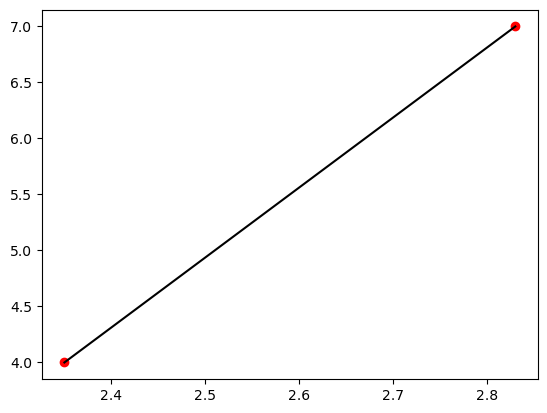

In [43]:
#calibration of the pH sensor
#stage.home()

#pH_device.move_to_loc("clean")
#pH_device.to_zpos("full_down")
#pH_device.to_zpos("full_up")

#pH_device.move_to_cell(row=0, col=0)
#pH_device.to_zpos("full_down")
#m4 = pH_device.pH_measure(30)
#pH_device.to_zpos("full_up")
#time.sleep(5)

#pH_device.move_to_loc("blot")
#pH_device.to_zpos("full_down")
#time.sleep(1)
#pH_device.to_zpos("full_up")

#pH_device.move_to_cell(row=0, col=1)
#pH_device.to_zpos("full_down")
#m7 = pH_device.pH_measure(30)
#pH_device.to_zpos("full_up")

m4=2.35
m7=2.83

y = [4,7]
x = [m4,m7]

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show()

#print(f'pH = {line[0]*m4_2+line[1]}')  #test measurement pH

In [ ]:
#Here, test this. Starting from Miller's LEGOLASGP.py
def measure(j,i):
    pH_device.move_to_cell(row=j, col=i)
    pH_device.to_zpos("full_down")
    k = pH_device.pH_measure(30)
    pH_device.to_zpos("full_up")
    return k                                #returns voltage

def clean():
    pH_device.move_to_loc("clean")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")

def blot():
    pH_device.move_to_loc("blot")
    pH_device.to_zpos("full_down")
    time.sleep(1)
    pH_device.to_zpos("full_up")


y = [7, 4, 7, 4, 7, 4]                       
x = []

for i in range(2):
    stage.home()
    clean()
    blot()
    if i==0:
        m7 = measure(3,0)                    #obtains voltage value
    if i==1:
        m4 = measure(3,1)    

for i in range(2,8): 
    if i % 2 == 0:
        m7 = measure(3,0)                    
        x.append(m7)
    else:
        m4 = measure(3,1)                    
        x.append(m4)

#PLOTTING FIT

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show()                                     


In [ ]:
voltage = pH_device.pH_measure(40)

# Added 6/19/24
pH = 16.746*voltage-40.188
print("voltage, pH:", voltage, pH)

In [41]:
voltage = pH_device.pH_measure(10)
#Adjust trimpot
#pH 7: initial 2.15 V; clock .5 turn 2.18 V; clock 1 turn 2.17 V; clock 1.5 turn 2.15 V
#pH 7: initial 0 turn 2.18 V; cc 1 turn 2.28V; cc 2 turn 2.25V; cc 3turn 2.26V; cc 4turn 2.41 V; cc 5 turn 2.35V, cc 6turn 2.35 V; cc 7turn 2.43V
#pH 7: cc 9turn 2.51V
#pH 4: cc 9turn 2.02V; cc 10turn 2.15V cc 11turn 2.26V
#pH 7: cc 11turn 2.83V
#pH 4: cc 11turn 2.33V - 2.37V

voltage for pH is Measured as: 2.37


In [38]:
# Repeated measurements of standard.
# Clean first.
row=3
col=0
for index in range(6):
    pH_device.move_to_cell(row, col)
    pHmeas = pH_device.pH_measure(20)
    print(f"row {row} col {col} pH {pHmeas}")     

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [ ]:
stage.home()

## Test depo_device (syringe) functionality

In [ ]:
# this is the syringe
depo_device

In [ ]:
stage.home()

In [ ]:
depo_device.move_to_cell(0,0)
depo_device.to_zpos("full_down")
#depo_device.to_zpos("full_up")

In [ ]:
#depo_device.move_to_cell(0,0)
#depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [ ]:
#depo_device.move_to_cell(0,0)
#depo_device.to_zpos("full_down")
#depo_device.to_zpos("full_up")
for i in range(2):
    depo_device.move_to_cell(0,i)
    depo_device.to_zpos("full_down")
    depo_device.to_zpos("full_up")

In [ ]:
# go to acid (or base or clean) well and test range of motion
depo_device.move_to_loc("clean")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [ ]:
# acquire 0.6 mL from the acid reservoir
depo_device.acquire(0.3, location="acid")

In [ ]:
# deposit the 0.6 mL into the 0,0 sample well
# calib is lost at this step. Regain by going home first.
stage.home()
depo_device.deposition(0.6, row=0, col=4)

## Example Loops

Use these loops as a reference for ways to construct your autonomous experiments and the functions needed

In [ ]:
depo_device.acquire(0.6, location="acid")   #run this line first before deposition
stage.home()
depo_device.deposition(0.1, row=0, col=1)
depo_device.deposition(0.2, row=0, col=2)
depo_device.deposition(0.3, row=0, col=3)

In [ ]:
pH_device.to_zpos("full_down")

In [ ]:
#for row in range(4):
for row in range(1):
    stage.home()
    for col in range(3,5):  #6 for full row
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=row, col=col)
        
        """
        if col==0:
            colleft=0
        else: 
            colleft=col-1
        pH_device.move_to_cell(row=row, col=colleft)
        """
        pH_device.move_to_cell(row=row, col=col)
        #pH = pH_device.pH_measure(stable_time=1)
        pH=10
        print(f"row {row} col {col} pH {pH}")

In [ ]:
def pHcorrection(pHmeas, p1, p2):
# correct pH values. pHmeas is the measured pH with no correction.
# p1 variable is the measured value of the pH4 standard
# p2 variable is the measured value of the pH7 standard  
  y1=4
  y2=7
  m = (y1-y2)/(p1-p2)            #slope
  b = y1 - m*p1                #y-intercept
  pHcorrected = m*pHmeas + b
  print ('p1, p2, slope, b, pHmeas, pHcorr: ', p1, p2, m, b, pHmeas, pHcorrected)

  return pHcorrected

test = pHcorrection(4.6, 4.95, 7.09)
print('test=', test)


In [ ]:
# 7/21/23 Loop through pH measurement. Clean first. Clean after each measurement.

# Run previous cell (def pHcorrection) first to correct pH measurement.

for row in range(1):
    stage.home()
    pH_device.move_to_cell(3,3)   #clean first
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    
    for col in range(0,6):  #6 for full row
    #for col in range(4,-1,-1):
        pH_device.move_to_cell(row=row, col=col)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHcorrected = pHcorrection(pHmeas, 4.95, 7.09)
        print(f"row {row} col {col} pHcorrected {pHcorrected}")
        pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
        pH_device.to_zpos("full_down")
        pH_device.to_zpos("full_up")
        pH_device.to_zpos("full_down")
        pH_device.to_zpos("full_up")
        

In [ ]:
pH_device.move_to_cell(row=1, col=1)
pHmeas = pH_device.pH_measure(stable_time=20)
pHcorrected = pHcorrection(pHmeas, 5.09, 5.57)
print(f"row {row} col {col} pHcorrected {pHcorrected}")
pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# Recheck pH4, pH7 standards.
pH_device.move_to_cell(row=1, col=3)
pH_device.pH_measure(20)

pH_device.move_to_cell(3,5)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.home()

In [ ]:
#pH_device.pH_positions

In [ ]:
#pH_device.motor_pH.get_position()

In [ ]:
stage.home()
row = 1
for col in range(6):
    depo_device.acquire(0.6, location="acid")
    depo_device.deposition(0.6, row=row, col=col)
    pH_device.move_to_cell(row=row, col=col)
    pH = pH_device.pH_measure(stable_time=10)
    print(f"row {row} col {col} pH {pH}")

In [ ]:
#dryrun
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
depo_device.deposition(0.6, row=0, col=0)

In [ ]:
#saveinfo
path= 'c:/Users/mlowe/Documents/AlphaImmersion_I_attendedLEGOLAS2023/LEGOLAS new4 Scripts/Plots'
SAVE= Path(path)
SAVE.mkdir(exist_ok=True)
plt.figure()
plt.title(f'Acquisition func, next ratio:')
iterations=1
plt.savefig(SAVE/f"{iterations}.png", facecolor='white')
plt.show()
plt.close()

In [15]:
# Calibrate pH in a cell above. Output: line
# Insert value of line here: line=[slope, intercept]. For example:
# line is a global variable. Run this first before Bayesian optimization.
line = [4.6, -.77]

In [16]:
import GPy
#path= 'c:/Users/mlowe/Documents/AlphaImmersion_I_attendedLEGOLAS2023/LEGOLAS new4 Scripts/Plots'
#SAVE= Path(path)
#SAVE.mkdir(exist_ok=True)

def Bayesian_optimization_pH():    #line is pH calibration
    # Uses GPy for Gaussian Process regression as surrogate function.

    # If True, this will simulate deposition and measurement. Not fully operational.
    simulate_val = True
    
    # X_grid is the list of all possible acid-base ratios that can be investigated.
    # This is the array that will be indexed with next_sample_index
    X_grid = np.linspace(0.1,1,20)[:,None]    #1D column matrix. Without [:,None], get 1D ndarray.
    other = np.linspace(2,10,20)[:,None]
    X_grid = np.append(X_grid,other)[:,None] # set of all acid and base ratios in one big column
    Dsize = X_grid.shape[0] # number in X_grid set. In this case: 40
    #print('X_grid:', X_grid)
    #print('Dsize:', Dsize)
    BO_lambda = .1
    
    # # set up GP.
    # X_samples = np.atleast_1d([1.])[:,None] # ratio of R to G
    # Y_samples = np.atleast_1d([210.])[:,None]
    # measured = np.asarray([14])
    # unmeasured = np.setdiff1d(np.linspace(0,14,15), measured).astype(int)
    
    # set up variables
    ratio = [0.1] # ratio of initial sample to study, 0 is no acid
    sample_index = 0 # index of ratio in list of ratios
    count = 0 #counter for moving to appropriate well

    #print('line:', line)
    
    # deposit first ratio in well and collect pH
    ## pH = BO_get_data(ratio,count)
    
    pH = BO_get_data(ratio, count)
    
    print('counter value:',count)
    print('Acid/Base ratio measured:',ratio)
    print('pH Value:',pH)
    
    measured = np.atleast_1d(sample_index) # indices of ratios that have been measured. Convert to ndarray.
    full_indices = np.linspace(0,X_grid.shape[0]-1,X_grid.shape[0]) # indices of all ratios to be investigated,
                                                                    # 0, 1, 2, ...39
    unmeasured = np.setdiff1d(full_indices, measured).astype(int)  # indices of ratios that are still to be measured
    X_samples = np.atleast_1d(ratio)[:,None] # X_samples is the RG ratios already studied
    Y_samples = np.atleast_1d(pH)[:,None] # Y_samples are the corresponding Red measurements for the RG ratios studied.
    
    # iteration loop for active learning (GP with exploration CO)
    for iterations in range(24):
        #reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
        """
        if iterations in home_check:
            # Go to Home Position
            time.sleep(10)
            reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
        """
        # Regression
        k = GPy.kern.RBF(1)
        m = GPy.models.GPRegression(X_samples, Y_samples, k)
        #blockPrint() # blocks printing statements to avoid printing GPy's optimization statements.
        m.optimize_restarts(5, robust=True);
        #enablePrint() # restarts the internal printing statements
        mean_full, variance_full = m.predict(X_grid) # Prediction
        mean, variance = m.predict(X_grid[unmeasured]) # Prediction just for unmeasured ratios

        # To Do: print out mean, mean_full, etc

        
        # # Bayesian optimization to maximize measured red by varying mixture.
        # BO_beta = 2 * math.log(Dsize * math.pow(iterations + 1,2) * math.pow(np.pi,2) / (6 * BO_lambda) )
        # alpha = -1 * np.abs(100. - mean) + math.sqrt(BO_beta) * variance
        
        # Active Learning
        alpha_full = variance_full # variance for all ratios. use variance (uncertainty) in Gaussian Process
                                   # to guide next sample
        alpha = variance # variance for unmeasured ratios
        ##alpha = (9/(iterations+1))*variance - np.absolute(mean-4.75)
        ##alpha_full = (9/(iterations+1))*variance_full - np.absolute(mean_full-4.75)
        sample_index = unmeasured[ np.argmax(alpha) ] # index of next ratio in X_grid. Next ratio has highest variance.
                                                      # Why can't I just use sample_index = np.argmax(alpha)?
        ratio = X_grid[sample_index,:] # next ratio
        print('The next ratio to investigate is', ratio)

        # plot
        plt.figure(figsize = (7,3))
        num_subplots = 2
        if ~simulate_val:   # ~ means NOT
            num_subplots = 3
        plt.subplot(1,num_subplots,1)
        plot_gp(X_grid, mean_full, variance_full, training_points=(X_samples,Y_samples)) # plot GP variance for all ratios
        bottom, top = plt.ylim()
        plt.plot([ratio, ratio],[bottom, top],'m') # indicate the next ratio to investigate
        plt.title('GP model for pH')
        #plt.tight_layout()
        #plt.savefig(SAVE/f"GP{iterations}.png", facecolor='white')
        #plt.show()
        #plt.close()
        
        plt.subplot(1,num_subplots,2)
        plt.plot(X_grid, alpha_full)  # plot the aquisition function for all ratios
        plt.plot([ratio, ratio],[np.min(alpha_full), np.max(alpha_full)],'m') # indicate the next ratio to be investigated
        plt.title(f'Acquisition func, next ratio:{ratio}')
        
        #plt.tight_layout()
        #plt.savefig(SAVE/f"Acquisition{iterations}.png", facecolor='white')
        plt.show()
        #plt.close()
           
        count+=1           #move to next well
        
        # collect data
        pH = BO_get_data(ratio, count) # run the next experiment.
        print('counter value:',count)
        print('Acid/Base ratio measured:',ratio)
        print('pH Value:',pH)
        
        measured = np.append(measured, sample_index) # add experiment ratio to the set of measured
        unmeasured = np.setdiff1d(full_indices, measured).astype(int)
        X_samples = np.append(X_samples, ratio)[:,None]
        Y_samples = np.append(Y_samples, pH)[:,None]
    
def BO_get_data(ratio, count):   #maybe replace with Adi's code def mix(ratio, row, col)
    #r = count % 6
    #c = count // 6
    if count <= 5:          # 1st row [0] - 6 samples
        r = 0
        c = count
    elif count <= 11:        # 2nd row [1]  - 6 samples ...
        r = 1
        c = count-6
    elif count <= 17:        # 3rd row [2] - 6 samples ...
        r = 2
        c = count - 12
    elif count <= 23:        # 4th row [3] - 6 sample ...
        r = 3
        c = count - 18
    
    acid_vol,base_vol = ratio_conversion(ratio)
    print('acid_vol', acid_vol)
    print('base_vol', base_vol)
    
    while acid_vol > 0.6:
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=r, col=c)
        acid_vol -= 0.6
    depo_device.acquire(acid_vol, location="acid")
    depo_device.deposition(acid_vol, row=r, col=c)
    
    while base_vol > 0.6:
        depo_device.acquire(0.6, location="base")
        depo_device.deposition(0.6, row=r, col=c)
        base_vol -= 0.6
    depo_device.acquire(base_vol, location="base")
    depo_device.deposition(base_vol, row=r, col=c)
    
    pH_device.move_to_cell(row=r, col=c)
    voltage = pH_device.pH_measure(stable_time=30)   #measures voltage
    pH = line[0]*voltage + line[1]    #line[0] is slope from calibration, line[1] is y-int from calib
    print(f"row {r} col {c} pH {pH} voltage {voltage}")
    
    #pH_device.move_to_loc("clean")
    #pH_device.to_zpos("full_down")
    #pH_device.to_zpos("full_up")

    return pH


def ratio_conversion(ratio):
    acid_vol = float(2.0*ratio[0]/(1+ratio[0]))
    base_vol = float(2.0 - acid_vol)
    return acid_vol,base_vol
            
    
def plot_gp(X, m, C, training_points=None):
    # plot results of Gaussian Process analysis.
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0], m[:,0] - 1.96*np.sqrt(np.diag(C)), m[:,0] + 1.96*np.sqrt(np.diag(C)), alpha=0.5)
    plt.plot(X, m, "-")  # Plot GP mean 
    plt.xlabel("x"), plt.ylabel("f")
    #plt.savefig(SAVE/f"gp{iterations}.png", facecolor='white')
    if training_points is not None:  # Plot training points if included
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.show()
        
    
        

In [17]:
##Bayesian_optimization_pH()
Bayesian_optimization_pH()  #line is pH calibration

acid_vol 0.18181818181818182
base_vol 1.8181818181818181


NameError: name 'depo_device' is not defined

In [ ]:
# test code for plotting

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2,1,1)  
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# LegolasOutline - challenges

slope: -1.1519972071912954, intercept: 4.432645649951558


<function matplotlib.pyplot.show(close=None, block=None)>

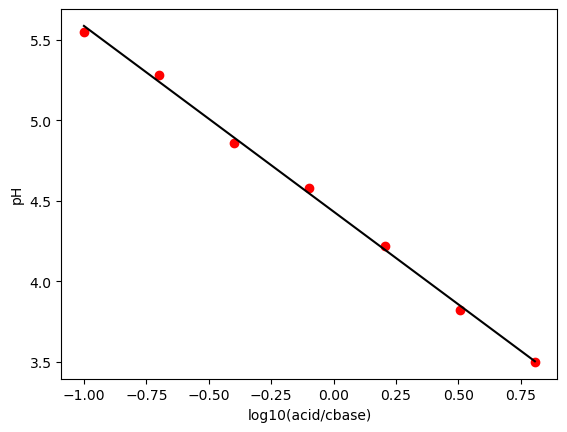

In [14]:
# first import everything

# Experiment: Prepare 8 ratios acid/cbase. Measure pH. Fit Henderson-Hasselbalch eq to data. 
# Used a linear fit where log10(ratio) is the x.

#y = [5.55, 5.28, 4.86, 4.58, 4.22, 3.57, 3.25]  #pH measured from left to right. Get slope=-1.3, yint=4.35

#Because pH4 and pH7 measurements drifted downwards, I will artificially alter the data below. pH4 drifted
#from 4 to 3.71.
y = [5.55, 5.28, 4.86, 4.58, 4.22, 3.82, 3.5]  #artificial. Get slope = -1.15, yint=4.43. Closer to ideal.
x = [np.log10(0.1), np.log10(1/5), np.log10(0.4), np.log10(0.8), np.log10(1.6), np.log10(3.2), np.log10(6.4)]

line2 = np.polyfit(x,y,1)
print(f'slope: {line2[0]}, intercept: {line2[1]}')
trend = np.poly1d(line2)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.xlabel("log10(acid/cbase)")
plt.ylabel("pH")
plt.show
